# Lab | Comparing regression models


For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [9]:
data = pd.read_csv('preprocessed_data.csv')
data.set_index('Customer', inplace=True)
data.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Gender_M,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Number of Open Complaints_1,Number of Open Complaints_2,Number of Open Complaints_3,Number of Open Complaints_4,Number of Open Complaints_5,Number of Policies_2,Number of Policies_3,Number of Policies_4,Number of Policies_5,Number of Policies_6,Number of Policies_7,Number of Policies_8,Number of Policies_9
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,-1.065356,0.583423,-0.777085,1.697383,-1.542810,0.028144,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
AI49188,2.184071,0.335939,1.020067,0.299696,-0.358507,0.935451,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
WW63253,0.501708,-1.271769,0.927906,0.299696,0.610469,0.752698,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
HB64268,-1.049252,0.173378,-0.592762,-0.299312,-0.143179,-1.203902,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
OC83172,0.697636,0.801930,-0.777085,-0.099642,1.651220,-1.097758,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


### Instructions

#### 1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.


In [33]:
y = data['Total Claim Amount']
X = data.drop('Total Claim Amount', axis=1)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2. Try a simple linear regression with all the data to see whether we are getting good results.


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
lm_predictions = lm_model.predict(X_test)
r2 = r2_score(y_test, lm_predictions)

print(r2)

0.36006458575142


#### 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.


In [37]:
def regression_tester(model_list):
    for model in model_list:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        print(model, "model has an R2 score of:", round(r2 * 100, 2))

        fig, ax = plt.subplots(figsize=(9, 9))
        sns.regplot(x=y_test, y=predictions)
        plt.show()     

#### 4. Use the function to check `LinearRegression` and `KNeighborsRegressor`.

In [14]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=4)

LinearRegression() model has an R2 score of: 36.01


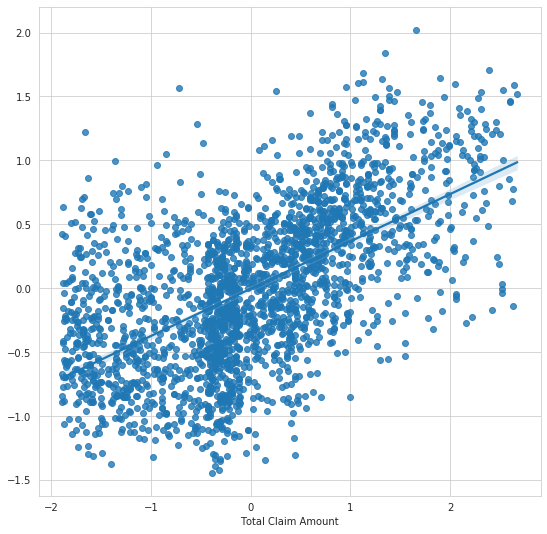

KNeighborsRegressor(n_neighbors=4) model has an R2 score of: 31.45


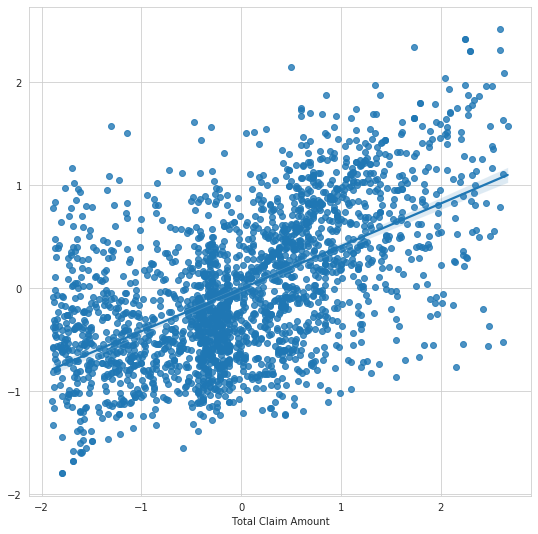

In [38]:
regression_tester([lm_model, knn_model])

#### 5. You can check also the `MLPRegressor` for this task!

In [16]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor()

LinearRegression() model has an R2 score of: 36.01


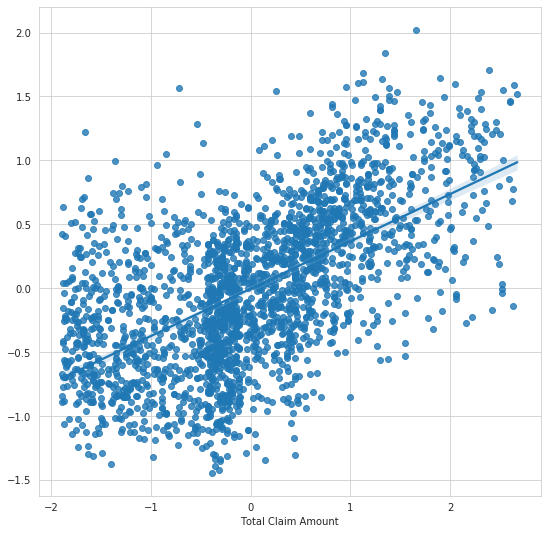

KNeighborsRegressor(n_neighbors=4) model has an R2 score of: 31.45


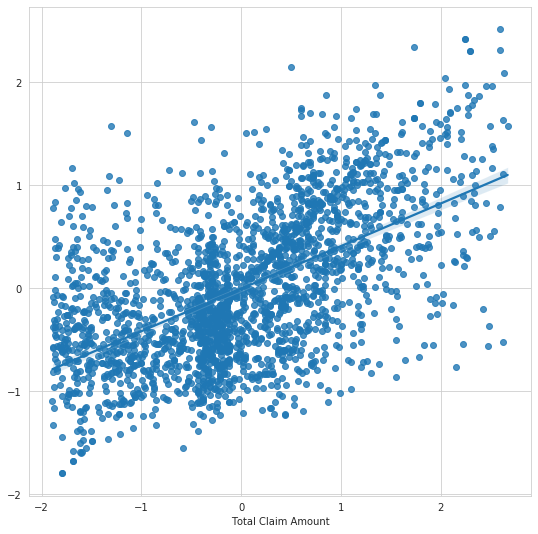

MLPRegressor() model has an R2 score of: 20.23


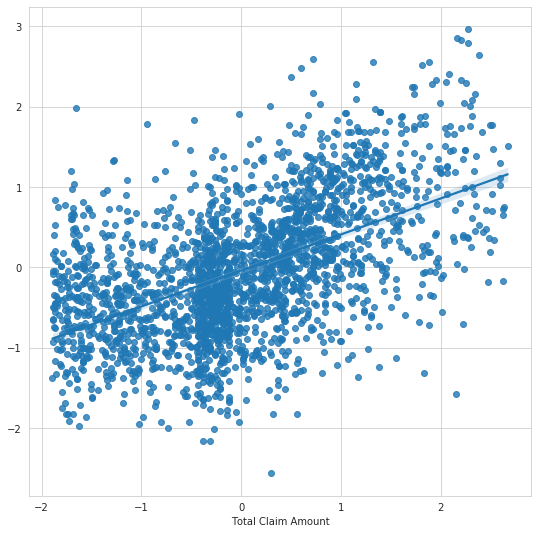

In [39]:
regression_tester([lm_model, knn_model, mlp_model])

#### 6. Check and discuss the results.

The linear regression has the best R2 score, closely followed by the K-Nearest Neighbours. The MLP Regressor has a much lower score than any of them.